<a href="https://colab.research.google.com/github/mzkhan2000/COLAB/blob/main/Data_Scientist_Study_Case_Monir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# check out if google dride mount suceessful 
!ls "/content/drive/My Drive/Data Scientist Study Case "

ads-50k.json


In [9]:
# dataset file path in the google dride
filename = '/content/drive/My Drive/Data Scientist Study Case /ads-50k.json'

# Appropriate analyses on dataset

In [11]:
import pandas as pd
ads_df = pd.read_json(filename, lines=True)

In [12]:
# first 5 rows of the dataframe
ads_df.head()

,id,title,abstract,content,metadata
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,<HTML><p>Are you looking to join a thriving bu...,{'standout': {'bullet1': 'Join a Sector that i...
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,<HTML><p>&middot;&nbsp;&nbsp;Casual hours as r...,{'additionalSalaryText': 'Attractive Commissio...
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,<HTML><p>Readify helps organizations innovate ...,"{'standout': {'bullet1': 'Design, develop, tes..."
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,<HTML><p><strong>WayPoint Recruitment&nbsp;</s...,{'additionalSalaryText': '$140k + Car Park - C...
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,<HTML>This is a key role within a market leadi...,{'standout': {'bullet1': 'Lead overarching str...


In [14]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   title     50000 non-null  object
 2   abstract  50000 non-null  object
 3   content   50000 non-null  object
 4   metadata  50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [15]:
ads_df.info

<bound method DataFrame.info of              id                                              title  \
0      38915469                             Recruitment Consultant   
1      38934839                     Computers Salesperson - Coburg   
2      38946054                              Senior Developer | SA   
3      38833950  Senior Commercial Property Manager | Leading T...   
4      38856271               Technology Manager | Travel Industry   
...         ...                                                ...   
49995  38836927                                       Data Analyst   
49996  38894517                  Regional Coordinator - Goldfields   
49997  38854483                              Warehouse Coordinator   
49998  38905179            Expression of Interest - Civil Labourer   
49999  38862684                               Provisioning Support   

                                                abstract  \
0      We are looking for someone to focus purely on ...   
1      

# Extract all the class and sub-class from the classification and subclassification in the metadata

In [16]:
# Extract all the class and sub-class from the classification and subclassification in the metadata
metadata = []
metadata = ads_df['metadata']

# extract all the class and sub-class from the metadata
top_class = []
sub_class = []

for row in metadata:
    # get value from the key of the dictionary
    classification = row.get('classification')
    subClassification = row.get('subClassification')

    # find the fist key of the classification dictionary
    key1 = list(classification.keys())[0]
    key2 = list(subClassification.keys())[0]

    # get value from the key of the classification dictionary
    get_class = classification.get(key1)
    top_class.append(get_class)
    # get value from the key of the subClassification dictionary
    get_sub_class = subClassification.get(key2)
    sub_class.append(get_sub_class)

In [17]:
# find a list of unique class
unique_top_class = list(dict.fromkeys(top_class))

In [18]:
# Total number of unique classes
len(unique_top_class)

30

In [19]:
# List of classes
print(unique_top_class)

['Education & Training', 'Retail & Consumer Products', 'Information & Communication Technology', 'Real Estate & Property', 'Mining, Resources & Energy', 'Accounting', 'Community Services & Development', 'Manufacturing, Transport & Logistics', 'Hospitality & Tourism', 'Engineering', 'Sales', 'Marketing & Communications', 'Healthcare & Medical', 'Banking & Financial Services', 'Human Resources & Recruitment', 'Trades & Services', 'Construction', 'Advertising, Arts & Media', 'Administration & Office Support', 'Sport & Recreation', 'Call Centre & Customer Service', 'Legal', 'Consulting & Strategy', 'Government & Defence', 'Science & Technology', 'Design & Architecture', 'Farming, Animals & Conservation', 'CEO & General Management', 'Insurance & Superannuation', 'Self Employment']


In [20]:
# find and create a list of unique sub-class
unique_sub_class = list(dict.fromkeys(sub_class))

In [21]:
# Total number of unique sub-classes
len(unique_sub_class)

337

In [22]:
# List of sub-classes
print(unique_sub_class)

['Other', 'Retail Assistants', 'Consultants', 'Commercial Sales, Leasing & Property Mgmt', 'Management', 'Business Services & Corporate Advisory', 'Child Welfare, Youth & Family Services', 'Team Leaders/Supervisors', 'Chefs/Cooks', 'Sales Representatives/Consultants', 'Brand Management', 'Medical Imaging', 'Help Desk & IT Support', 'Warehousing, Storage & Distribution', 'Management - Vocational', 'Residential Sales', 'Nursing - Aged Care', 'Payroll', 'Financial Planning', 'Physiotherapy, OT & Rehabilitation', 'Account & Relationship Management', 'Travel Agents/Consultants', 'Recruitment - Agency', 'Marketing Assistants/Coordinators', 'Labourers', 'Foreperson/Supervisors', 'Plant & Machinery Operators', 'Media Strategy, Planning & Buying', 'Management Accounting & Budgeting', 'Developers/Programmers', 'Recruitment - Internal', 'Agency Account Management', 'Administrative Assistants', 'Nursing - Theatre & Recovery', 'Couriers, Drivers & Postal Services', 'Coaching & Instruction', 'Teachi

In [23]:
title = []
title = ads_df['title']
# Create a dataframe with ads title, class and subclass
job_class_df = pd.DataFrame(
    {
        'class': top_class,
        'sub_class': sub_class,
        'job_tile': title
    })

In [24]:
# Total number of ads with job title for each of the class
print(job_class_df['class'].value_counts(ascending=False))

Information & Communication Technology    5235
Trades & Services                         4736
Healthcare & Medical                      4599
Manufacturing, Transport & Logistics      3213
Accounting                                2859
Administration & Office Support           2538
Sales                                     2473
Hospitality & Tourism                     2466
Education & Training                      2337
Construction                              2292
Retail & Consumer Products                1932
Engineering                               1747
Government & Defence                      1710
Mining, Resources & Energy                1434
Community Services & Development          1350
Marketing & Communications                1308
Human Resources & Recruitment             1258
Legal                                     1114
Call Centre & Customer Service            1047
Banking & Financial Services               990
Real Estate & Property                     912
Design & Arch

In [25]:
# Total number of ads with job title for each of the sub-class
print(job_class_df['sub_class'].value_counts(ascending=False))

Other                                   2688
Management                              1618
Administrative Assistants               1131
Developers/Programmers                  1072
Sales Representatives/Consultants       1038
                                        ... 
Navy                                       3
Oil & Gas - Exploration & Geoscience       3
Nannies & Babysitters                      2
Fund Administration                        1
Regional Council                           1
Name: sub_class, Length: 337, dtype: int64


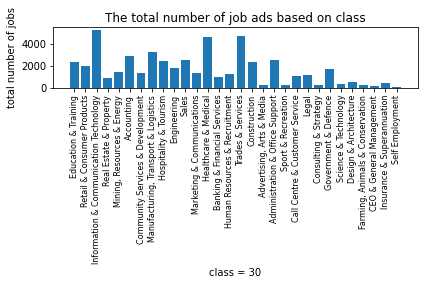

In [27]:
from matplotlib import pyplot as plt

class_job_total = []
# total number of job ads based on class
for c in unique_top_class:
    each_class_total = (job_class_df['class'] == c).sum()
    class_job_total.append(each_class_total)

# Creating a simple bar chart to show total number of job ads based on class
plt.bar(unique_top_class, class_job_total)
plt.title('The total number of job ads based on class')
plt.xlabel('class = 30', fontsize=10)
plt.xticks(rotation='vertical', fontsize=8)
plt.ylabel('total number of jobs', fontsize=10)
plt.tight_layout()
plt.show()

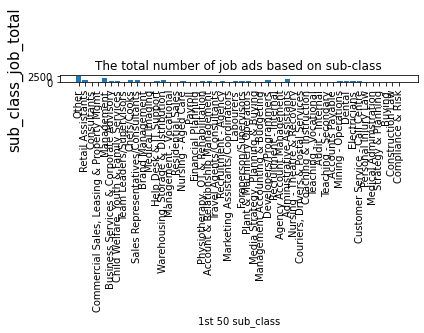

In [30]:
sub_class_job_total = []
# total number of job ads based on sub class class
for sc in unique_sub_class:
    each_sub_class_total = (job_class_df['sub_class'] == sc).sum()
    sub_class_job_total.append(each_sub_class_total)

# Creating a simple bar chart to show total number of job ads based on sub-class
plt.bar(unique_sub_class[:50], sub_class_job_total[:50])
plt.title('The total number of job ads based on sub-class')
plt.xlabel('1st 50 sub_class', fontsize=10)
plt.xticks(rotation='vertical')
plt.ylabel('sub_class_job_total', fontsize=15)
plt.tight_layout()
plt.show()

In [33]:
# Find all the sub-class based on a class and the ads title based on a sub-class
sample_class = 'Information & Communication Technology'
sample_sub_class = 'Consultants'

sub_class_for_sample_class = []
ads_role = []
# job ads based on sub class
for i in range(len(job_class_df['job_tile'])):
    if job_class_df['sub_class'].iloc[i] == sample_sub_class:
        role = job_class_df['job_tile'].iloc[i]
        ads_role.append(role)
    if job_class_df['class'].iloc[i] == sample_class:
        sc = job_class_df['sub_class'].iloc[i]
        sub_class_for_sample_class.append(sc)

In [35]:
# Number and the list of sub-class based on 'Information & Communication Technology' class
print(len(list(dict.fromkeys(sub_class_for_sample_class))))
print(sub_class_for_sample_class)

22
['Consultants', 'Management', 'Help Desk & IT Support', 'Developers/Programmers', 'Developers/Programmers', 'Management', 'Developers/Programmers', 'Sales - Pre & Post', 'Security', 'Architects', 'Engineering - Hardware', 'Business/Systems Analysts', 'Consultants', 'Business/Systems Analysts', 'Business/Systems Analysts', 'Business/Systems Analysts', 'Business/Systems Analysts', 'Engineering - Network', 'Developers/Programmers', 'Programme & Project Management', 'Testing & Quality Assurance', 'Engineering - Hardware', 'Networks & Systems Administration', 'Developers/Programmers', 'Management', 'Networks & Systems Administration', 'Sales - Pre & Post', 'Programme & Project Management', 'Developers/Programmers', 'Engineering - Software', 'Developers/Programmers', 'Developers/Programmers', 'Product Management & Development', 'Developers/Programmers', 'Programme & Project Management', 'Business/Systems Analysts', 'Management', 'Business/Systems Analysts', 'Engineering - Network', 'Techn

In [36]:
# The ads title based on the 'Consultants' sub-class
print(ads_role)

['Senior Developer | SA', 'SAP CRM Technical Consultant', 'Technical Consultant - ServiceNow SA', 'SAP C4C Consultant', 'Principal Consultant', 'Business Consultant -SAP', 'Dynamics 365 CRM Technical Architect / Principal Consultant', 'Senior ERP Consultant - Pronto', 'Dynamics 365 CRM Technical Architect / Principal Consultant', 'Microsoft Dynamics (CRM) Functional Consultant', 'Data Scientist', 'Tableau Dashboard Designer', 'CRM Dynamics Technical and Functional Consultants', 'MS Dynamics CRM Functional Consultant', 'ICT Consultant - Project Unify (004195)', 'Oracle HCM Cloud Functional Consultant \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 - Permanent Role', 'Data Warehouse Developer', 'SEM/PPC Account Manager for Ad-Tech agency', 'Oracle CX Functional Consultant | Contract | North Melbourne', 'Senior Consultant - Data and Analytics', 'ERP Software Consultant', 'SAP MM Consultant', 'Cloud Consultant', 'Implementation Specialist', 'SAP SRM/MM Functional Consultant', 'Service

# Feature selection 

In [42]:
# Feature selection from the datsset
# sample_class = 'Information & Communication Technology'
# sample_sub_class = 'Consultants'
abstract = []
content = []
abstract = ads_df['abstract']
content = ads_df['content']
feature_content = []
job_title = []

# Feature selection for a sample sub_class
for i in range(len(ads_df)):
    if sub_class[i] == sample_sub_class and top_class[i] == sample_class:
        feature_content.append(abstract[i])
        feature_content.append(content[i])
        job_title.append(title[i])

# join all the text from the feature_content list
feature_content = ''.join(feature_content)

# Initial approach: a embedding-based keyword extraction 

## Model 1: Generate embedding (word vectors) using Word2Vec

In [44]:
# Python program to generate embedding (word vectors) using Word2Vec

# importing necessary modules for embedding
!pip install --upgrade gensim

import nltk
nltk.download('punkt')

# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

import numpy
import multiprocessing
import re, string # using to remove regular expression, special characters in txt files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [45]:
# text preprocessing to generate embedding (word vectors) using Word2Vec
text = feature_content
text = text.lower()
text = re.sub('\[.*?\]', '', text)
text = re.sub("\\W", " ", text)
text = re.sub('https?://\S+ |www\.\S+', '', text)
text = re.sub('<.*?>', '', text)
text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
text = re.sub('\n', '', text)
text = re.sub('\w*\d\w*', '', text)
# Replaces escape character with space
text = text.replace("\n", " ")

In [46]:
# using nltk.tokenize process sentence tokenize and tokenize the sentence into words
data = []
# iterate through each sentence in the file
for i in sent_tokenize(text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [47]:
# Create CBOW Word2Ve model
embedding_model = gensim.models.Word2Vec(data, min_count = 1, vector_size = 300, window = 10)

In [51]:
words = sorted(embedding_model.wv.key_to_index)

In [52]:
# sample_class = 'Information & Communication Technology'
# sample_sub_class = 'Consultants'
# Keywords for the Consultants subclass
print(words)

['a', 'aaaand', 'aakanksha', 'aaliyah', 'ab', 'abap', 'abbyy', 'abilities', 'ability', 'able', 'abm', 'aboriginal', 'abound', 'about', 'above', 'abreast', 'abs', 'absence', 'absolute', 'absolutely', 'abstract', 'academic', 'academy', 'accelerate', 'acceleration', 'accept', 'acceptance', 'accepted', 'access', 'accessibility', 'accessible', 'accommodation', 'accomplished', 'accomplishing', 'accordance', 'according', 'accordingly', 'account', 'accountabilities', 'accountability', 'accountable', 'accountancy', 'accountants', 'accounting', 'accounts', 'accreditation', 'accredited', 'accuracy', 'accurate', 'accurately', 'accustomed', 'ace', 'achieve', 'achieved', 'achievement', 'achievements', 'achiever', 'achieves', 'achieving', 'acquire', 'acquiring', 'acquisition', 'acquisitions', 'across', 'act', 'acting', 'action', 'actionable', 'actions', 'activate', 'active', 'activehr', 'actively', 'activities', 'activity', 'acts', 'actually', 'actuarial', 'acumen', 'ad', 'adaps', 'adapt', 'adaptable

## Initial approach: a embedding-based keyword extraction
### Model 2: Generate keywords and keyphases using KeyBERT and Keyphrase_vectorizers

In [49]:
!pip install keybert
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.1 MB/s 
     |████████████████████████████████| 232 kB 27.3 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 
     |████████████████████████████████| 4.2 MB 49.4 MB/s 
     |████████████████████████████████| 1.2 MB 44.2 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 6.6 MB 45.0 MB/s 
     |████████████████████████████████| 596 kB 48.6 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=36ec2fea421508ef90fdb10af14925aa18ab5460b8c58d3980683f6cc083dc40
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=9b83c5df9f76be85047a52debb330d7518791a007d9640a59ae9691aefe93f8d
  S

In [50]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT

In [53]:
# keywords generate using the KeyBERT model
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(text)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [57]:
# keywords generate using the KeyBERT model
key_words = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words=None)

In [58]:
# sample_class = 'Information & Communication Technology'
# sample_sub_class = 'Consultants'
# Keywords for the Consultants subclass
print(key_words)

[('consultant', 0.4424), ('readify', 0.4416), ('clients', 0.4391), ('stakeholders', 0.4379), ('enterprise', 0.4146)]


In [59]:
# key-phrases generate using the KeyBERT model
key_phrases = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words=None)

In [60]:
# sample_class = 'Information & Communication Technology'
# sample_sub_class = 'Consultants'
# key_phrases for the Consultants subclass
print(key_phrases)

[('consultant br', 0.5472), ('br consultant', 0.539), ('stakeholders br', 0.5329), ('readify embraces', 0.525), ('consulting br', 0.5222)]


# Final approach: Role-Based Skill & Experience Extraction


### Role-Based Feature Group Selection

In [92]:
# Python program to generate Role-Based Feature Group Selection

# sample job titles 
sample_job_title = ['Systems Engineer', 'Data Engineer', 'Data Scientist', 'Data Analyst', 'Solution Architect', 'Cloud Engineer', 'AWS Cloud Engineer']
all_feature_text = []

for job in sample_job_title:
  feature_text = []
  for i in range(len(ads_df)):
      # Match ads title with sample_job_title
      match = re.search(job, title[i])
      if match:
          feature_text.append(abstract[i])
          feature_text.append(content[i])
  # join all the text from the list of abstract
  joined_feature_text = ''.join(feature_text)
  all_feature_text.append(joined_feature_text)

### Rule-Based Features Extraction

In [95]:
# list of given key words to get the interested feature text from the data
key_experience = ['Experience', 'EXPERIENCE REQUIRED', 'experience required', 'experience is desirable',
                  'experience is highly desirable', 'experienced', 'Extensive experience in', 'Experience with',
                  'hands-on experience', 'Strong experience with', 'Strong experience in', 'Skills',
                  'Skills required', 'Skills needed', 'technical skills', 'ability', 'expertise', 'expect',
                  'desirable', 'passion', 'passionate', 'highly', 'desirable']


In [104]:
all_key_feature_text = []
for text in all_feature_text:
  key_feature_text = []
   # splitlines of the text from the abstract and content for each of the sample job titles
  list_of_feature_text = text.splitlines()
  # capture the lines that contains any of the key-experiences from key_experiences list
  for line in list_of_feature_text:
      for item in key_experience:
          if item in line:
              if line not in key_feature_text:
                  key_feature_text.append(line)
  key_feature_text = ''.join(key_feature_text)
  all_key_feature_text.append(key_feature_text)  

In [102]:
!pip install yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 2.8 MB/s 
     |████████████████████████████████| 132 kB 8.7 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=74011 sha256=1e2bcf5beda0a1f17e7c73d8ed72879f48a3cda24afd15e99fd6935ffae09c6c
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [106]:
import yake
kw_extractor = yake.KeywordExtractor()
keywords_for_role = []
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 50
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
for text in all_key_feature_text:
  keywords = custom_kw_extractor.extract_keywords(text)
  keywords_for_role.append(keywords)

In [113]:
# Role-Based Skill & Experience Extraction 
print('Role:', sample_job_title[0])
print('Key Skill & Experience Extracted:')
keywords_for_role[0]

Role: Systems Engineer
Key Skill & Experience Extracted:


[('Senior Systems Engineer', 6.516579129001047e-06),
 ('Systems Engineer', 8.15159398501971e-06),
 ('Control Systems Engineer', 1.3247806128361187e-05),
 ('Systems Engineering experience', 3.407895436379414e-05),
 ('systems engineering', 4.378369879378785e-05),
 ('strong', 5.750434703338474e-05),
 ('systems engineering services', 6.607996170009682e-05),
 ('systems', 6.632024788285902e-05),
 ('Systems Engineer role', 6.709800162796907e-05),
 ('experienced Systems Engineer', 9.353817899002946e-05),
 ('strong system engineer', 9.514030874782874e-05),
 ('Linux Systems Engineer', 0.00010199419440058238),
 ('Security Systems Engineer', 0.00012356466102851033),
 ('Senior Systems', 0.00013950077482547906),
 ('experience', 0.00014573733424951495),
 ('control systems', 0.00015601105008968908),
 ('HTML', 0.0001578435395371145),
 ('Level Systems Engineer', 0.0001640166484468646),
 ('Control system design', 0.0001730840707047124),
 ('Microsoft System Centre', 0.00017394576276006141),
 ('Systems Eng

In [114]:
# Role-Based Skill & Experience Extraction 
print('Role:', sample_job_title[1])
print('Key Skill & Experience Extracted:')
keywords_for_role[1]

Role: Data Engineer
Key Skill & Experience Extracted:


[('data engineer', 6.243151915370954e-05),
 ('Data', 9.207410436628852e-05),
 ('Big Data Engineer', 0.0001042859152646172),
 ('experience Data Engineers', 0.00014128417913231926),
 ('big data', 0.00016326292727439953),
 ('strong', 0.0003085096748352235),
 ('experience', 0.0003353919510036092),
 ('Azure Data', 0.000368920686505402),
 ('data engineering', 0.00037741812666890635),
 ('Senior Data Engineer', 0.00040118971986748624),
 ('Azure Data Factory', 0.0004213972501033649),
 ('Azure Data Engineer', 0.0004588201497202506),
 ('AWS Data Engineer', 0.0005440804231760459),
 ('SQL Data Engineer', 0.0005512688581466508),
 ('data pipelines', 0.0005593079373776719),
 ('Azure Data Lake', 0.000595740939678325),
 ('Experience building data', 0.0006670735891422364),
 ('HTML', 0.0007244782859000151),
 ('Data Engineer required', 0.0007285060668680735),
 ('strong SQL skills', 0.0008249169475456424),
 ('highly experience Data', 0.000861680544969296),
 ('Hadoop Data Engineer', 0.0008846303529293942),
 

In [115]:
# Role-Based Skill & Experience Extraction 
print('Role:', sample_job_title[2])
print('Key Skill & Experience Extracted:')
keywords_for_role[2]

Role: Data Scientist
Key Skill & Experience Extracted:


[('Data Scientist', 0.00011084665817592655),
 ('data science', 0.0001357227153275758),
 ('Surveillance Data Scientist', 0.00021603721232467464),
 ('Data', 0.000241472240019418),
 ('Senior Data Scientist', 0.0002445653849762033),
 ('data science team', 0.000326842985678166),
 ('strong', 0.00037479910870570436),
 ('strong data science', 0.0004261555985702572),
 ('experienced Data Scientist', 0.0006348984501104978),
 ('strong Data Scientist', 0.0006944098227644423),
 ('Data Scientist role', 0.0007383106275295846),
 ('machine learning', 0.0007494678469506343),
 ('data science projects', 0.0007948783516510005),
 ('Lead Data Scientist', 0.0008114792271637028),
 ('Market Surveillance Data', 0.0009179842926729837),
 ('HTML', 0.0010969307717906612),
 ('Strong data analytics', 0.0011863220695486085),
 ('Experience', 0.0012785811188775309),
 ('Data Scientist skill', 0.0013595749284683752),
 ('Data Scientist Consultant', 0.0013685783336777992),
 ('Big Data', 0.001607693537366961),
 ('strong Data',

In [116]:
# Role-Based Skill & Experience Extraction 
print('Role:', sample_job_title[3])
print('Key Skill & Experience Extracted:')
keywords_for_role[3]

Role: Data Analyst
Key Skill & Experience Extracted:


[('Senior Data Analyst', 6.45772824965955e-06),
 ('Data Analyst', 8.567001630493522e-06),
 ('Data', 4.1838495795259646e-05),
 ('Data Analyst role', 4.764936445995111e-05),
 ('experienced Data Analyst', 4.8106320756321016e-05),
 ('strong', 7.899109873588151e-05),
 ('Data Analyst required', 9.222978756929499e-05),
 ('Data Analyst experience', 0.00010255840355520453),
 ('Data Analyst designs', 0.00010834330281080673),
 ('data analysis', 0.00012742302459431868),
 ('Data Analyst SQL', 0.00013830984842533948),
 ('Senior Data', 0.0001422684480747525),
 ('HTML', 0.00017307726873826485),
 ('Data Analyst working', 0.00017557645501004577),
 ('data analytics experience', 0.00019810764100332325),
 ('analyst', 0.0002059909070459306),
 ('experience', 0.00022260709313866634),
 ('Data Analyst position', 0.0002241585274105285),
 ('Master Data Analyst', 0.0002342098418256181),
 ('CRM Data Analyst', 0.00024232793751542843),
 ('Business Data Analyst', 0.00024286717491762768),
 ('strong data analysis', 0.00

In [117]:
# Role-Based Skill & Experience Extraction 
print('Role:', sample_job_title[4])
print('Key Skill & Experience Extracted:')
keywords_for_role[4]

Role: Solution Architect
Key Skill & Experience Extracted:


[('Solution Architect', 1.8495362860013126e-05),
 ('Solution Architecture experience', 4.5247190604706235e-05),
 ('Senior Solution Architect', 7.778528224243739e-05),
 ('strong', 8.382644733246089e-05),
 ('Solution Architecture', 8.519561881607866e-05),
 ('experienced Solution Architect', 8.549173675650205e-05),
 ('Digital Solution Architect', 0.00014008446417691756),
 ('Solution', 0.00015612235205985527),
 ('NET Solution Architect', 0.00017426843543730854),
 ('experience', 0.00019450535231880465),
 ('Salesforce Solution Architect', 0.00020113540556251558),
 ('Solution Architect role', 0.00020897710394987852),
 ('Cybersecurity Solution Architect', 0.00023176154297509577),
 ('Security Solutions Architect', 0.00023928004837520908),
 ('HTML', 0.0002492714533118298),
 ('Application Solution Architect', 0.00025137772027237717),
 ('solutions', 0.00025523373286189823),
 ('Principal Solution Architect', 0.00026081487143795115),
 ('Infrastructure Solution Architect', 0.00027676874321334286),
 (

In [118]:
# Role-Based Skill & Experience Extraction 
print('Role:', sample_job_title[5])
print('Key Skill & Experience Extracted:')
keywords_for_role[5]

Role: Cloud Engineer
Key Skill & Experience Extracted:


[('Cloud Engineer', 0.00035112438569302057),
 ('AWS Cloud Engineer', 0.0003619771061244945),
 ('Cloud Engineer Experience', 0.0004535945730700584),
 ('strong', 0.0006994695623638387),
 ('experienced cloud engineer', 0.0008228580025388423),
 ('Cloud', 0.0008940560583972683),
 ('Senior Cloud Engineer', 0.0009718362091374966),
 ('experience', 0.0009863485792259501),
 ('successful Cloud Engineer', 0.0012099642350054006),
 ('AWS cloud', 0.0013062541668632664),
 ('Azure Cloud Platform', 0.0014460992878662837),
 ('AWS cloud platforms', 0.0014803467479846755),
 ('Lead Cloud Engineer', 0.0015375155254644115),
 ('Cloud Engineer Responsibilities', 0.0015844962891029177),
 ('developing AWS cloud', 0.0023654532144775343),
 ('strong experience', 0.002419495538388568),
 ('HTML', 0.002566388275420793),
 ('Cloud Engineer works', 0.002839288835558993),
 ('Engineer Experience Requirements', 0.0028427976339405843),
 ('AZURE', 0.002847519930162594),
 ('AWS', 0.002912250222364428),
 ('Cloud services', 0.003

In [119]:
# Role-Based Skill & Experience Extraction 
print('Role:', sample_job_title[6])
print('Key Skill & Experience Extracted:')
keywords_for_role[6]

Role: AWS Cloud Engineer
Key Skill & Experience Extracted:


[('Experience configuring alerting', 0.00015203996106132994),
 ('AWS environment driving', 0.00028747716930653007),
 ('whilst maintaining service', 0.0003966639316380047),
 ('maintaining service levels', 0.0003966639316380047),
 ('environment driving efficiencies', 0.000415667802868242),
 ('cost savings whilst', 0.0004893277259951172),
 ('savings whilst maintaining', 0.0004893277259951172),
 ('source code management', 0.0004893277259951172),
 ('code management tools', 0.0004893277259951172),
 ('Java and JSON', 0.0016461448589913726),
 ('Experience configuring', 0.0019256793519612586),
 ('Amazon DynamoDB', 0.00270974407591417),
 ('Bitbucket or equivalent', 0.00270974407591417),
 ('Web Services', 0.002951597923337168),
 ('Experience with programming', 0.003106715422544906),
 ('Experience with source', 0.003106715422544906),
 ('Identify and exploit', 0.0031859807405051096),
 ('AWS environment', 0.0036357441031001714),
 ('telemetry for Web', 0.0036357441031001714),
 ('Experience with SQL',